In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date


In [61]:
df = pd.read_excel("ing_data_1.xlsx")

In [62]:
start_date = None # date(2021,1,1)
if start_date:
    df = df[df["date"] >= pd.to_datetime(start_date)]
    df.reset_index(inplace=True,drop=True)

In [63]:
def categorize_periods(*args, df):
    sorted_dates = sorted([datetime.strptime(date, "%Y-%m-%d") for date in args])
    periods = []

    for createdate in df['date']:
        period = None
        for i, date in enumerate(sorted_dates):
            if createdate < date:
                period = f"PERIOD{i+1}"
                break
        if period is None:
            period = f"PERIOD{len(sorted_dates) + 1}"
        periods.append(period)
    
    df['Period'] = periods
    return df


time_list = ('2023-06-01', '2023-08-01')
df = categorize_periods(*time_list, df=df)

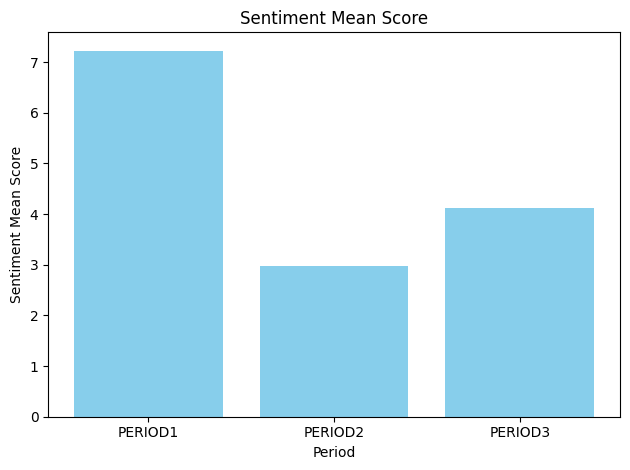

In [64]:
period_mean_scores = df.groupby('Period')['Sentiment_Mean_Score'].mean().reset_index()

plt.bar(period_mean_scores['Period'], period_mean_scores['Sentiment_Mean_Score'], color='skyblue')
plt.title('Sentiment Mean Score')
plt.xlabel('Period')
plt.ylabel('Sentiment Mean Score')

plt.tight_layout()
plt.show()


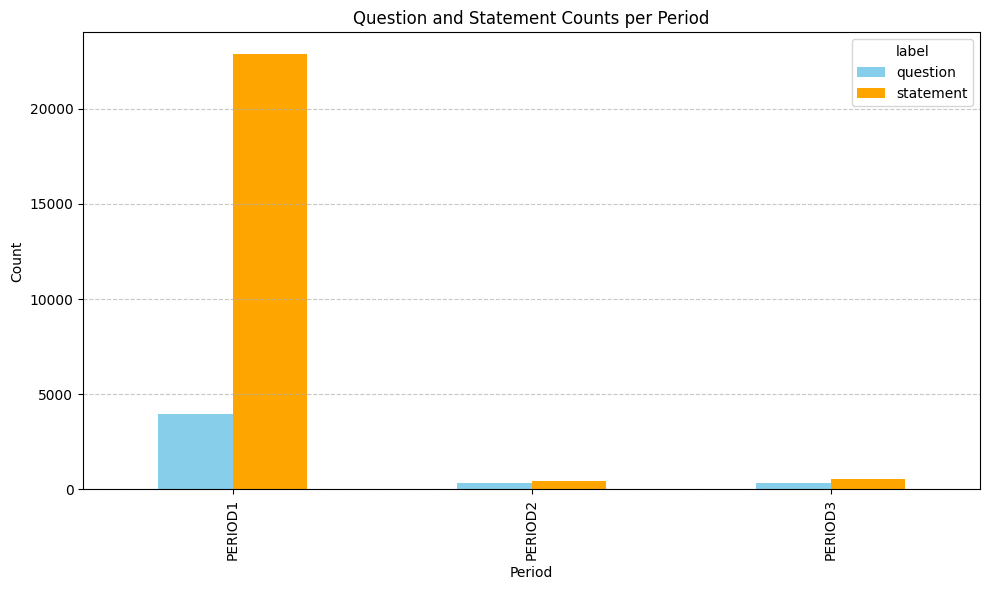

In [65]:
df['label'] = df.apply(lambda row: 'question' if row['question'] > row['statement'] else 'statement', axis=1)

label_counts = df.groupby(['Period', 'label']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

label_counts.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])

ax.set_title('Question and Statement Counts per Period')
ax.set_xlabel('Period')
ax.set_ylabel('Count')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


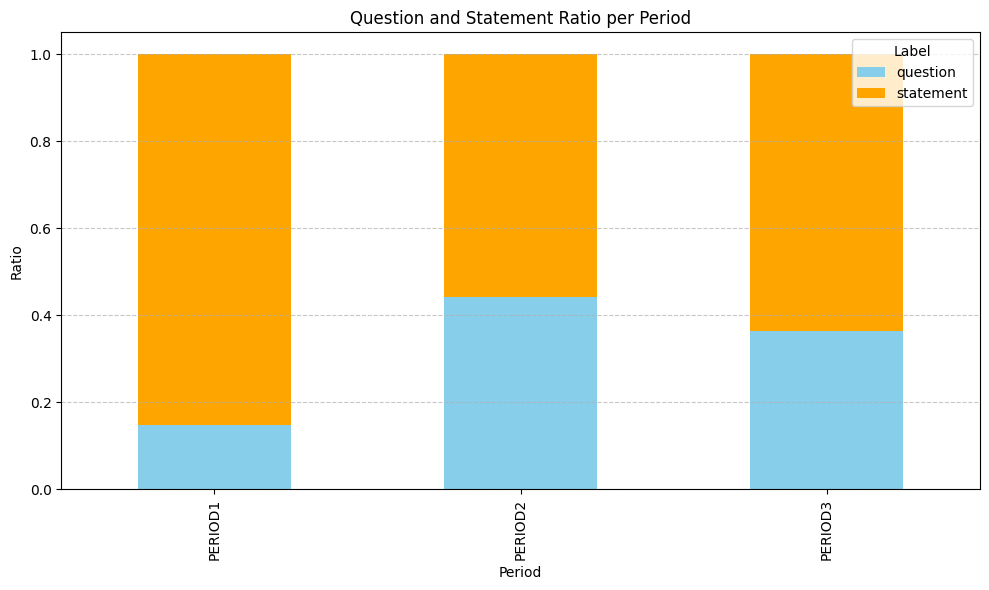

In [66]:
label_ratios = label_counts.div(label_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

label_ratios.plot(kind='bar', ax=ax, stacked=True, color=['skyblue', 'orange'])

ax.set_title('Question and Statement Ratio per Period')
ax.set_xlabel('Period')
ax.set_ylabel('Ratio')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Label')

plt.tight_layout()
plt.show()

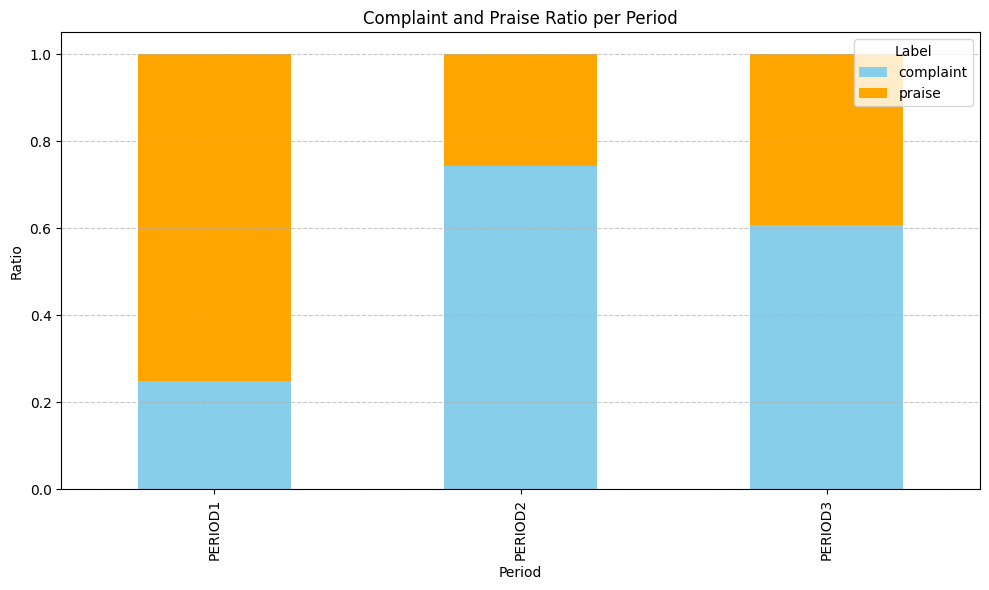

In [67]:
df['label'] = df.apply(lambda row: 'complaint' if row['complaint'] > row['praise'] else 'praise', axis=1)

label_counts = df.groupby(['Period', 'label']).size().unstack(fill_value=0)

label_ratios = label_counts.div(label_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

label_ratios.plot(kind='bar', ax=ax, stacked=True, color=['skyblue', 'orange'])

ax.set_title('Complaint and Praise Ratio per Period')
ax.set_xlabel('Period')
ax.set_ylabel('Ratio')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Label')

plt.tight_layout()
plt.show()

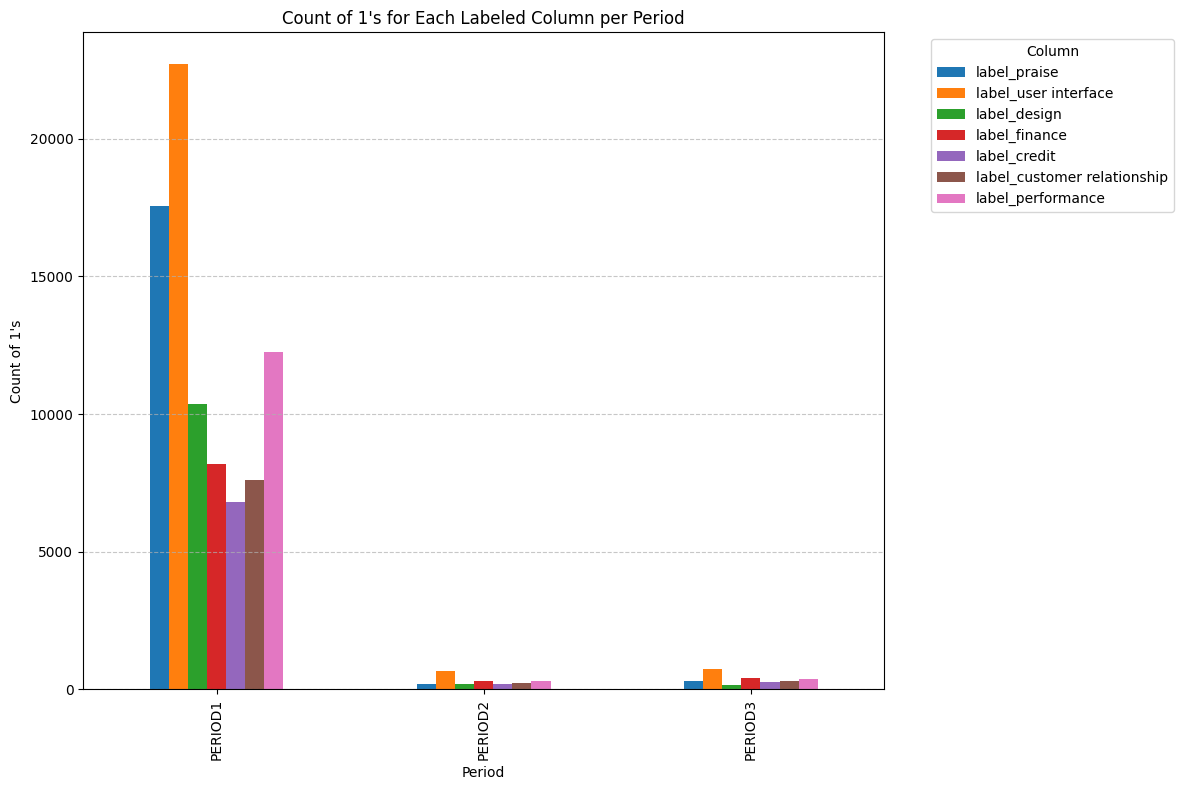

In [68]:
# Columns to be considered for labeling and plotting
columns_to_label = ['praise', 'user interface', 'design', 'finance', 'credit', 'customer relationship', 'performance']

# Label the columns based on the condition
for column in columns_to_label:
    df[f'label_{column}'] = df[column].apply(lambda x: 1 if x > 0.7 else 0)

# Count the number of 1's for each labeled column for each period
label_1_counts = df.groupby('Period')[[f'label_{column}' for column in columns_to_label]].sum()
# Plotting using bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for count of 1's for each labeled column against periods
label_1_counts.plot(kind='bar', ax=ax)

# Customizing the plot
ax.set_title('Count of 1\'s for Each Labeled Column per Period')
ax.set_xlabel('Period')
ax.set_ylabel('Count of 1\'s')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Column', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.tight_layout()
plt.show()
